In [2]:
pip install -u pandas-datareader

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [11]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#get stock price
df = web.DataReader('GOOGL', data_source='yahoo', start='2018-01-01', end='2021-05-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1075.979980,1053.020020,1053.020020,1073.209961,1588300,1073.209961
2018-01-03,1096.099976,1073.430054,1073.930054,1091.520020,1565900,1091.520020
2018-01-04,1104.079956,1094.260010,1097.089966,1095.760010,1302600,1095.760010
2018-01-05,1113.579956,1101.800049,1103.449951,1110.290039,1512500,1110.290039
2018-01-08,1119.160034,1110.000000,1111.000000,1114.209961,1232200,1114.209961
...,...,...,...,...,...,...
2021-04-26,2324.530029,2297.320068,2304.520020,2309.929932,1601900,2309.929932
2021-04-27,2318.449951,2286.159912,2317.629883,2290.979980,2219300,2290.979980
2021-04-28,2431.379883,2353.219971,2392.500000,2359.040039,4055300,2359.040039


In [3]:
df.shape

(838, 6)

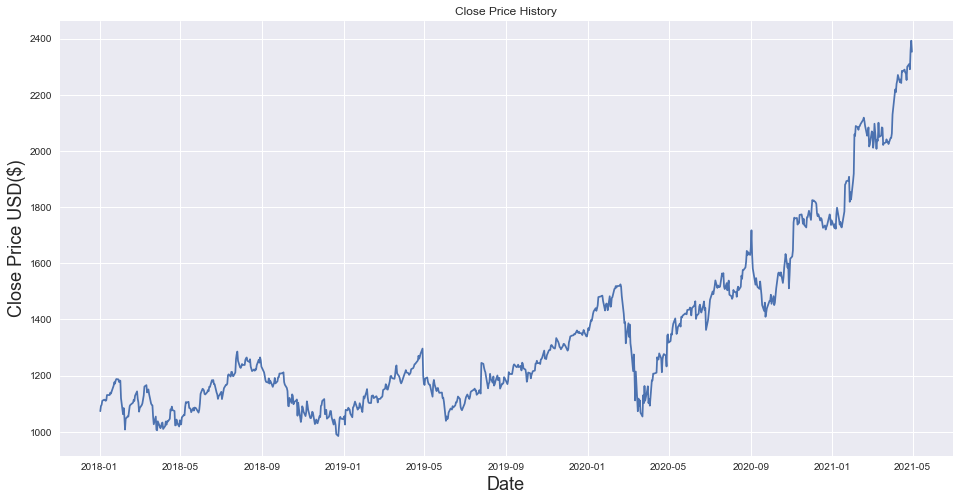

In [4]:
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [5]:
# p = order of the AR term
# d = # of differencing required to make time series stationary
# q = the order of the MA term



In [6]:
df = df[['Close']].copy()

In [7]:
df.describe()

,Close
count,838.000000
mean,1341.457827
std,302.857691
min,984.669983
25%,1125.500000
50%,1220.570007
75%,1478.309967
max,2392.760010


In [8]:
df.head()

,Close
Date,
2018-01-02,1073.209961
2018-01-03,1091.520020
2018-01-04,1095.760010
2018-01-05,1110.290039
2018-01-08,1114.209961


In [9]:
#check price to check if time series is stationary

from statsmodels.tsa.stattools import adfuller
#ADF test will tell us if model is stationary. If p-value is greater than .05 we can conclude it is not stationary

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 1.086715954239282
p-value: 0.9951016387801966


In [18]:
from statsmodels.graphics.tsaplots import plot_acf


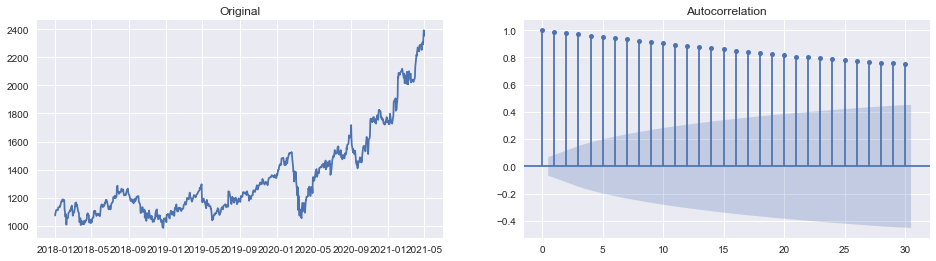

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

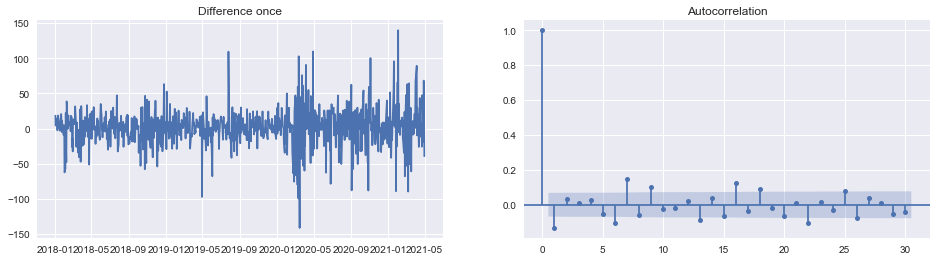

In [85]:
# check if we difference once

diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [86]:
pip install pmdarima


In [87]:
from pmdarima.arima.utils import ndiffs

In [88]:
#double checking our # of difference on 'Close'

ndiffs(df.Close, test='adf')

1

In [89]:
#Finding p. p is order of the Auto Regressive term. The # of lags to be used as a predictor

In [90]:
from statsmodels.graphics.tsaplots import plot_pacf

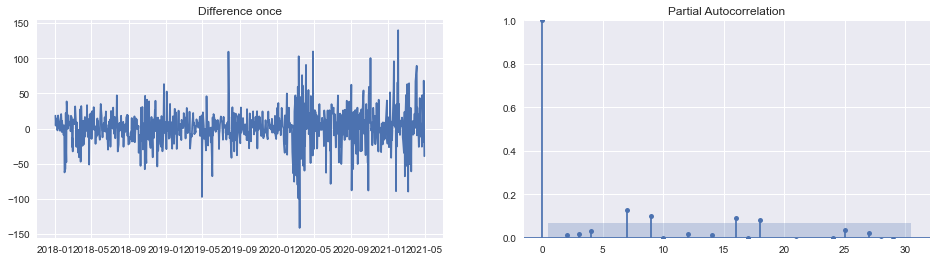

In [91]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

#we see 7, 9 16, 17 can be used as p terms

In [92]:
#Finding q. q is order of the moving average. The # of lagged forecast errors that should go into ARIMA model

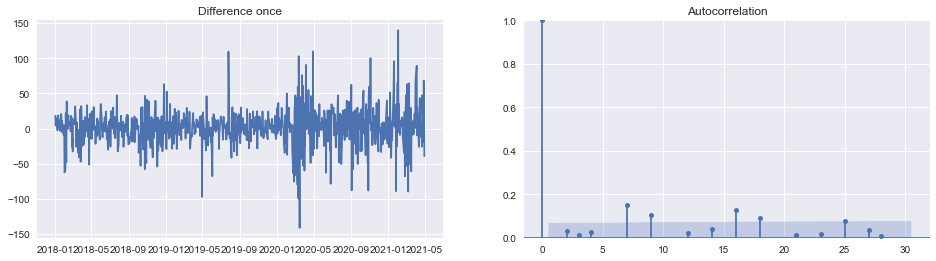

In [93]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

#we can see our q term could be 7, 9, 16

In [94]:
from statsmodels.tsa.arima_model import ARIMA

In [95]:
#Starting ARIMA Model

In [179]:
model = ARIMA(df.Close, order=(7, 1, 7))

result = model.fit(disp=0)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [180]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  837
Model:                 ARIMA(7, 1, 7)   Log Likelihood               -3885.245
Method:                       css-mle   S.D. of innovations          14787.590
Date:                Wed, 12 May 2021   AIC                           7802.490
Time:                        19:53:40   BIC                           7878.167
Sample:                             1   HQIC                          7831.499
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7178        nan        nan        nan         nan         nan
ar.L1.D.Close     0.1298    8.6e-07   1.51e+05      0.000       0.130       0.130
ar.L2.D.Close     0.3081    1.7e-06   1.

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [181]:
# Plot residual errors
residuals = pd.Dataframe(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, desity=True)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [168]:
#Train test split

In [182]:
n = int(len(df) *0.8)
train = df.Close[:n]
test= df.Close[n:]

In [183]:
#check split correctly
print(len(train))
print(len(test))

670
168


In [185]:
model = ARIMA(train, order=(7, 1, 6))
result= model.fit(disp=0)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [186]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  669
Model:                 ARIMA(7, 1, 6)   Log Likelihood               -3014.536
Method:                       css-mle   S.D. of innovations             21.851
Date:                Wed, 12 May 2021   AIC                           6059.073
Time:                        19:54:47   BIC                           6126.659
Sample:                             1   HQIC                          6085.253
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8446      0.736      1.147      0.251      -0.598       2.288
ar.L1.D.Close    -0.9650      0.132     -7.316      0.000      -1.224      -0.706
ar.L2.D.Close     0.3321      0.078      4.238      0.000       0.179       0.486
ar.L3.D.Close     1.1560      0.095     12.198      0.000       0.970       1.342
ar.L4.D.Close     0.2257      0.116      1.942      0.052      -0.002       0.454
ar.L5.D.Close    -0.9310      0.059    -15.742      0.000      -1.047      -0.815
ar.L6.D.Close    -0.9045      0.096     -9.407      0.000      -1.093      -0.716
ar.L7.D.Close    -0.0700      0.065     -1.081      0.280      -0.197       0.057
ma.L1.D.Close     0.8429      0.125      6.742      0.000       0.598       1.088
ma.L2.D.Close    -0.4856      0.063     -7.686      0.000      -0.609      -0.362
ma.L3.D.Close    -1.1015      0.116     -9.535      0.000      -1.328      -0.875
ma.L4.D.Close    -0.0613      0.098     -0.625      0.532      -0.254       0.131
ma.L5.D.Close     0.9788      0.089     11.031      0.000       0.805       1.153
ma.L6.D.Close     0.7059      0.089      7.976      0.000       0.532       0.879
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9049           -0.4269j            1.0006           -0.0702
AR.2            0.9049           +0.4269j            1.0006            0.0702
AR.3           -0.9598           -0.4146j            1.0455           -0.4351
AR.4           -0.9598           +0.4146j            1.0455            0.4351
AR.5           -0.5164           -0.9174j            1.0527           -0.3316
AR.6           -0.5164           +0.9174j            1.0527            0.3316
AR.7          -11.7874           -0.0000j           11.7874           -0.5000
MA.1            0.9054           -0.4245j            1.0000           -0.0698
MA.2            0.9054           +0.4245j            1.0000            0.0698
MA.3           -0.5569           -0.9110j            1.0677           -0.3373
MA.4           -0.5569           +0.9110j            1.0677            0.3373
MA.5           -1.0419           -0.3964j            1.1148           -0.4421
MA.6           -1.0419           +0.3964j            1.1148            0.4421
-----------------------------------------------------------------------------
"""

In [200]:
step = 168

fc, se, conf = result.forecast(step)

In [201]:
fc

array([1649.42997916, 1644.75833988, 1651.81878634, 1654.31008803,
       1655.8982355 , 1654.00806388, 1657.19558113, 1654.66435387,
       1649.78168593, 1654.50683242, 1648.08952644, 1650.08858165,
       1651.81578692, 1652.89506205, 1655.30551994, 1659.64930767,
       1663.32983824, 1663.10478114, 1669.22419636, 1666.95945324,
       1667.2693452 , 1667.53866235, 1664.54304128, 1663.44089199,
       1662.30172878, 1662.78653092, 1661.43921676, 1665.68009175,
       1666.98190192, 1669.77451152, 1674.58785123, 1676.049375  ,
       1678.81742428, 1679.69381165, 1680.29063593, 1678.25868459,
       1677.96742304, 1676.04731448, 1673.98908083, 1674.82203825,
       1674.16162994, 1676.15188053, 1678.52509585, 1681.81536811,
       1684.62200781, 1688.02572071, 1690.51991233, 1691.08835639,
       1692.40861339, 1691.04122044, 1689.90317672, 1688.42627476,
       1686.98918074, 1686.16520711, 1686.37973608, 1687.93012875,
       1689.55000303, 1693.13869354, 1696.04598221, 1699.12224

In [202]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

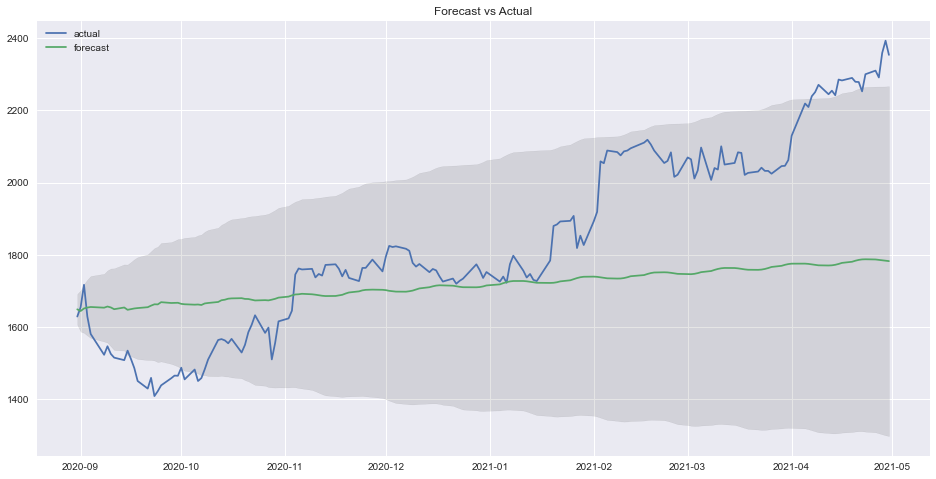

In [203]:
plt.figure(figsize=(16,8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [204]:
MSE = np.square(np.subtract(df['Close'],fc)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

249.13968720349592
